This notebook looks at the top business analytics program ranked by TopUniversities. Our ranking incorporates the average ranking of two other popular sources: Shanghai & TimesHigherEducation. This helps in determing what are the possible criteria that the top ranking agencies look at, so some of these things can be incorporated when designing our graduate program.

In [0]:
import numpy as np
import pandas as pd

#### Graphs/Charts/Plots libraries

# !pip install matplotlib-venn
import seaborn as sns
import matplotlib.pyplot as plt

try:
    from matplotlib_venn import venn3
except:
    !pip install matplotlib-venn
    from matplotlib_venn import venn3

# The following line is needed to show plots inline in notebooks
%matplotlib inline 


In [0]:
df_TopGraduate = pd.read_csv('GraduateProgramsData.csv')

In [0]:
# df_TopGraduate

In [0]:
cols = ['School', 'Program', 'Overall_TopUniversities', 'Overall_TimesHigherEducation', 'Overall_Shanghai']

all_criterias = []

for col_nme in df_TopGraduate.columns:
    if col_nme not in cols:
        all_criterias.append(col_nme)

In [0]:
df_TopGraduate ['Overall_Shanghai_Average'] = df_TopGraduate ['Overall_Shanghai'] /5 

overall_cols = ['Overall_TopUniversities', 'Overall_TimesHigherEducation', 'Overall_Shanghai_Average']

df_TopGraduate['Overall Score'] = df_TopGraduate[overall_cols].mean(axis=1)

In [0]:
Acronyms = ['MIT', 'ICL', 'Texas', 'ESSEC', 'ESADE', 'USC', 'Manchester', 'Warwick', 'Edinburgh', 'Minnesota']

df_TopGraduate ['School (Acronym)'] = Acronyms

df_TopGraduate['School (Program)'] = df_TopGraduate['School (Acronym)'].map(str) + ' (' + df_TopGraduate['Program'].map(str) + ')' 

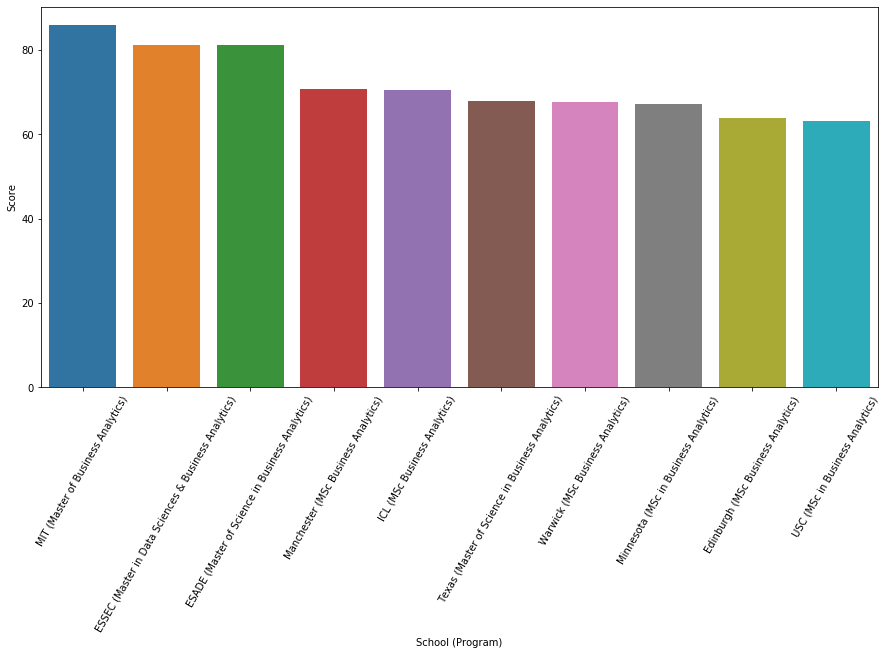

In [0]:
###### Plot Top Programs ######

df = df_TopGraduate.sort_values('Overall Score', ascending=False)

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='School (Program)', y='Overall Score', 
            data=df, ax = ax)

#ax.set_title('Top 10 Business Analytics Programs')
ax.set_ylabel('Score')
ax.set_xlabel('School (Program)')
plt.xticks(rotation=60)
#ax.get_xaxis().set_visible(False)
plt.show()

In [0]:
DFCRiteria = pd.DataFrame(columns=['All Criteria','Ranking Agency', 'Criteria'])
DFCRiteria['All Criteria'] = all_criterias

In [0]:
ranking_agency = []
for i in range(15):
    if i<5:
        ranking_agency.append('TopUniversities')
    elif i>=5 and i<10:
        ranking_agency.append('TimesHigherEducation')
    else:
        ranking_agency.append('Shanghai')

        
DFCRiteria['Ranking Agency'] = ranking_agency

In [0]:
Criteria = ['Value for Money', 'Diversity', 'Teaching', 'Alumni Outcomes', 'Employability',
           'Teaching', 'Research', 'Citations', 'Employability', 'Diversity',
            'Research', 'Citations', 'Diversity', 'Top', 'Award']
DFCRiteria['Criteria'] = Criteria

In [0]:
DFCRiteria

,All Criteria,Ranking Agency,Criteria
0,Value_for_Money,TopUniversities,Value for Money
1,Diversity,TopUniversities,Diversity
2,Thought_Leadership,TopUniversities,Teaching
3,Alumni_Outcomes,TopUniversities,Alumni Outcomes
4,Employability,TopUniversities,Salary
5,Teaching,TimesHigherEducation,Teaching
6,Research,TimesHigherEducation,Research
7,Citations,TimesHigherEducation,Citations
8,Industry Outcome,TimesHigherEducation,Salary
9,International_Outlook,TimesHigherEducation,Diversity


In [0]:
TopUniversities = DFCRiteria[(DFCRiteria['Ranking Agency'] == 'TopUniversities')] 
TimesHigherEducation = DFCRiteria[(DFCRiteria['Ranking Agency'] == 'TimesHigherEducation')] 
Shanghai = DFCRiteria[(DFCRiteria['Ranking Agency'] == 'Shanghai')] 

In [0]:
TopUniversities

,All Criteria,Ranking Agency,Criteria
0,Value_for_Money,TopUniversities,Value for Money
1,Diversity,TopUniversities,Diversity
2,Thought_Leadership,TopUniversities,Teaching
3,Alumni_Outcomes,TopUniversities,Alumni Outcomes
4,Employability,TopUniversities,Salary


In [0]:
TimesHigherEducation

,All Criteria,Ranking Agency,Criteria
5,Teaching,TimesHigherEducation,Teaching
6,Research,TimesHigherEducation,Research
7,Citations,TimesHigherEducation,Citations
8,Industry Outcome,TimesHigherEducation,Salary
9,International_Outlook,TimesHigherEducation,Diversity


In [0]:
Shanghai

,All Criteria,Ranking Agency,Criteria
10,PUB,Shanghai,Research
11,CNCI,Shanghai,Citations
12,IC,Shanghai,Diversity
13,Top,Shanghai,Top
14,Award,Shanghai,Award


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


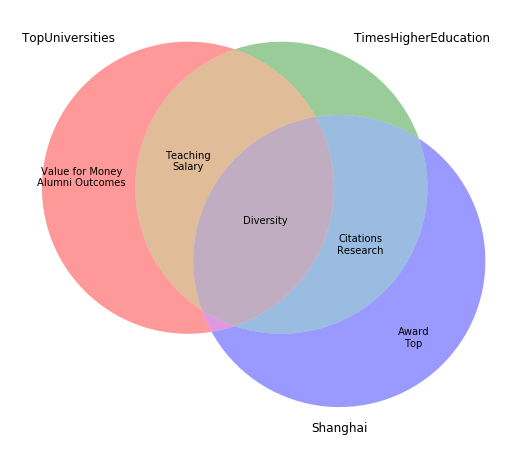

In [0]:
# import matplotlib.pyplot as plt
# from matplotlib_venn import venn3

set1 = set(TopUniversities['Criteria'])
set2 = set(TimesHigherEducation['Criteria'])
set3 = set(Shanghai['Criteria'])

plt.figure(figsize=(12,8))
venn = venn3([set1, set2, set3], ('TopUniversities', 'TimesHigherEducation', 'Shanghai'))

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))


plt.show()